In [1]:
import sys
sys.path.append('../')
import pbjam as pb
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import lightkurve as lk

I'm going to first run this on some simulated data of 16 Cyg A

In [2]:
#The stellar parameters are for 16 Cyg A
nus = 0.411 #uHz
i = np.deg2rad(56.) #rad

In [3]:
locs = np.genfromtxt('../pbjam/data/simulated_data/locs.txt')

# Select some modes
mid = int(np.floor(len(locs)/2))
l0s = locs[mid:mid+1,0]
l2s = locs[mid-1:mid:,2]
modelocs = np.append(l0s, l2s)
modeids = [0]*len(l0s) + [2]*len(l2s)

#I'll assume all modes have an uncertainty of 1 microhertz
sigmodelocs = np.ones(len(modelocs))

In [4]:
# Select surrounding data
ff = np.genfromtxt('../pbjam/data/simulated_data/freqs.txt')
pp = np.genfromtxt('../pbjam/data/simulated_data/model.txt')
sel = [(ff >= np.min(modelocs)-25) & (ff <= np.max(modelocs+25))]
f = ff[tuple(sel)]
p = pp[tuple(sel)] 

/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


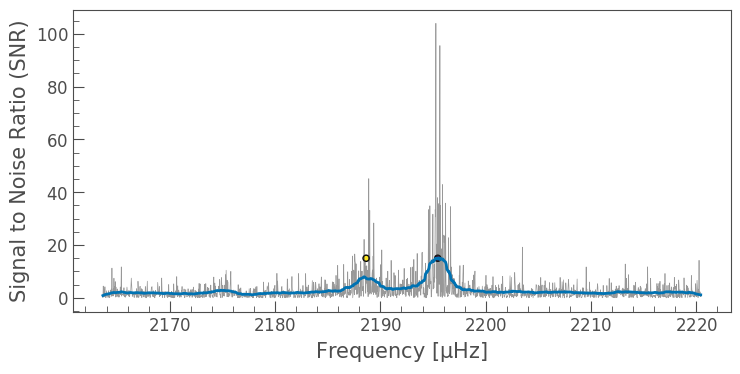

In [5]:
snr = lk.periodogram.SNRPeriodogram(f*u.microhertz, u.Quantity(p, None))
ax = snr.plot(alpha=.5)
snr.smooth(filter_width=2.).plot(ax=ax, linewidth=2)
plt.scatter(modelocs, [15]*len(modelocs),c=modeids, s=20, edgecolor='k')
plt.show()

In [6]:
peakbag = pb.peakbag(snr, modelocs, sigmodelocs, modeids)

In [8]:
fit = peakbag()

In [9]:
i, nus, df = peakbag.get_output(fit)

ValueError: No parameter i

Inference for Stan model: pbstan_ee987c3433bdf72ce9236c29815c84d3.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
logAmp[1]     1.97  1.4e-3   0.05   1.87   1.94   1.97    2.0   2.07   1383    1.0
logAmp[2]     1.62  1.6e-3   0.06    1.5   1.58   1.62   1.66   1.74   1510    1.0
logGamma[1]   0.06  1.1e-3   0.04  -0.04   0.03   0.06   0.08   0.14   1558    1.0
logGamma[2]   0.04  1.4e-3   0.05  -0.06 9.1e-3   0.04   0.08   0.14   1273    1.0
locs[1]     2195.4  2.2e-3   0.09 2195.2 2195.3 2195.4 2195.5 2195.6   1653    1.0
locs[2]     2188.6  4.1e-3   0.15 2188.3 2188.5 2188.6 2188.7 2188.9   1246    1.0
vsini         0.23  4.2e-3   0.11   0.02   0.15   0.24   0.31   0.42    691   1.01
nus           0.41  2.7e-3   0.09   0.23   0.35   0.42   0.48    0.6   1211    1.0
b             1.75  1.1e-3   0.04   1.67   1.72   1.75   1.78   1.84